In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
import seaborn as sns
import math

In [2]:
df_data_1, df_data_2, df_data_3  = pd.read_csv('HR_comma_sep.csv'), pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv'), pd.read_csv('turnover.csv', encoding = 'ISO-8859-1')
df_model_1, df_model_2, df_model_3 = df_data_1.copy(),df_data_2.copy(),df_data_3.copy()

In [3]:
df_model_1.describe(include=np.object)

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [4]:
df_model_2.describe(include=np.object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [5]:
df_model_3.describe(include=np.object)

,gender,industry,profession,traffic,coach,head_gender,greywage,way
count,1129,1129,1129,1129,1129,1129,1129,1129
unique,2,16,15,8,3,2,2,3
top,f,Retail,HR,youjs,no,m,white,bus
freq,853,289,757,318,683,584,1002,681


In [6]:
# deklarasi kolom yang akan dihapus
drop2 = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
# drop kolom yang akan dihapus
df_model_2 = df_model_2.drop(drop2,axis=1)

In [7]:
# rename kolom target
df_model_1 = df_model_1.rename(columns={'left': 'churn'})
df_model_2 = df_model_2.rename(columns={'Attrition': 'churn'})
df_model_3 = df_model_3.rename(columns={'event': 'churn'})

# rename kolom treatment
df_model_1 = df_model_1.rename(columns={'promotion_last_5years': 'treatment'})
df_model_2 = df_model_2.rename(columns={'OverTime': 'treatment'})
df_model_3 = df_model_3.rename(columns={'coach': 'treatment'})

In [8]:
# deklarasi kolom string
string1, string2, string3 = ['salary'], ['churn', 'treatment', 'BusinessTravel'], ['treatment']
# observasi data unique
for col in string1:
    display(col, df_model_1[col].unique())
for col in string2:
    display(col, df_model_2[col].unique())
for col in string3:
    display(col, df_model_3[col].unique())

'salary'

array(['low', 'medium', 'high'], dtype=object)

'churn'

array(['Yes', 'No'], dtype=object)

'treatment'

array(['Yes', 'No'], dtype=object)

'BusinessTravel'

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

'treatment'

array(['no', 'yes', 'my head'], dtype=object)

In [9]:
# Deklarasi target dan treatment dataset 1
df_model_1.salary = df_model_1.salary.map({'low': 0, 'medium': 1, 'high':2})

In [10]:
# Deklarasi target dan treatment dataset 2
df_model_2.churn = df_model_2.churn.map({'Yes': 1, 'No': 0})
df_model_2.treatment = df_model_2.treatment.map({'Yes': 1, 'No': 0})
# Deklarasi BusinessTravel
df_model_2.BusinessTravel = df_model_2.BusinessTravel.map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})

In [11]:
# Deklarasi target dan treatment dataset 3
df_model_3.treatment = df_model_3.treatment.map({'yes': 0, 'no': 1, 'my head':2})
df_model_3 = df_model_3.loc[df_model_3.treatment <=1].reset_index(drop=True)

In [12]:
# One-Hot Encoding untuk ketiga dataset:
df_model_1, df_model_2, df_model_3 = pd.get_dummies(df_model_1), pd.get_dummies(df_model_2), pd.get_dummies(df_model_3)

In [13]:
# Fungsi untuk mendeklarasikan Target Class:
def deklarasi_target_class(df:pd.DataFrame):
    #CN:
    df['target_class'] = 0 
    #CR:
    df.loc[(df.treatment == 0) & (df.churn == 0),'target_class'] = 1 
    #TN:
    df.loc[(df.treatment == 1) & (df.churn == 1),'target_class'] = 2 
    #TR:
    df.loc[(df.treatment == 1) & (df.churn == 0),'target_class'] = 3 
    return df

In [14]:
df_model_1, df_model_2, df_model_3 = deklarasi_target_class(df_model_1), deklarasi_target_class(df_model_2), deklarasi_target_class(df_model_3)

In [15]:
# kalkulasi korelasi treatment 
# pd.options.display.max_rows=100
def korelasi_treatment(df:pd.DataFrame):
    correlation = df[['treatment','churn']].corr(method ='pearson') 
    return(pd.DataFrame(round(correlation.loc['churn'] * 100,2)))

In [16]:
display(korelasi_treatment(df_model_1).iloc[0,0])
display(korelasi_treatment(df_model_2).iloc[0,0])
display(korelasi_treatment(df_model_3).iloc[0,0])

-6.18

24.61

-4.0

In [17]:
# split data menjadi data train dan data test
from sklearn.model_selection import train_test_split
def split_data(df:pd.DataFrame):
    X = df.drop(['churn','target_class'],axis=1)
    y = df.churn
    z = df.target_class
    X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.3, random_state=42, stratify=df['treatment'])
    return X_train, X_test, y_train, y_test, z_train, z_test

In [18]:
#proses split data untuk ketiga dataset
X_train_1, X_test_1, y_train_1, y_test_1, z_train_1, z_test_1 = split_data(df_model_1)
X_train_2, X_test_2, y_train_2, y_test_2, z_train_2, z_test_2 = split_data(df_model_2)
X_train_3, X_test_3, y_train_3, y_test_3, z_train_3, z_test_3 = split_data(df_model_3)

In [19]:
import xgboost as xgb
def model_machine_learning(df:pd.DataFrame, X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:pd.DataFrame, y_test:pd.DataFrame, z_train:pd.DataFrame, z_test:pd.DataFrame):
    # Siapkan dataframe baru hasil prediksi
    hasil_prediksi = pd.DataFrame(X_test).copy()
    # proses train model CP dengan algoritma XGB
    model_cp = xgb.XGBClassifier().fit(X_train.drop('treatment',axis=1), y_train)
    # proses prediksi dan probabilitas model CP
    prediksi_cp = model_cp.predict(X_test.drop('treatment',axis=1))
    probabilitas_cp = model_cp.predict_proba(X_test.drop('treatment',axis=1))
    # masukkan hasil prediksi dan probabilitas model CP ke dataframe
    hasil_prediksi['prediksi_churn'] = prediksi_cp
    hasil_prediksi['proba_churn'] = probabilitas_cp[:,1]
    # proses train model Uplift dengan algoritma XGB
    model_uplift = xgb.XGBClassifier().fit(X_train.drop('treatment',axis=1), z_train)
    # proses prediksi dan probabilitas model Uplift
    prediksi_uplift = model_uplift.predict(X_test.drop('treatment',axis=1))
    probabilitas_uplift = model_uplift.predict_proba(X_test.drop('treatment',axis=1))
    # masukan hasil prediksi, probabilitas, dan skor model Uplift ke dataframe
    hasil_prediksi['prediksi_target_class'] = prediksi_uplift
    hasil_prediksi['proba_CN'] = probabilitas_uplift[:,0] 
    hasil_prediksi['proba_CR'] = probabilitas_uplift[:,1] 
    hasil_prediksi['proba_TN'] = probabilitas_uplift[:,2] 
    hasil_prediksi['proba_TR'] = probabilitas_uplift[:,3]
    hasil_prediksi['skor_uplift'] = hasil_prediksi.eval('proba_CN/(proba_CN+proba_CR) + proba_TR/(proba_TN+proba_TR) - proba_TN/(proba_TN+proba_TR) - proba_CR/(proba_CN+proba_CR)')
    #masukkan validasi churn dan target class ke dataframe
    hasil_prediksi['churn'] = y_test
    hasil_prediksi['target_class'] = z_test
    return hasil_prediksi

In [20]:
from sklearn.metrics import accuracy_score
# evaluate predictions
def evaluasi_akurasi(df:pd.DataFrame):
    akurasi_cp = accuracy_score(df['churn'], df['prediksi_churn'])
    print('Akurasi model CP: %.2f%%' % (akurasi_cp * 100.0))
    akurasi_uplift = accuracy_score(df['target_class'], df['prediksi_target_class'])
    print('Akurasi model Uplift: %.2f%%' % (akurasi_uplift * 100.0))

In [21]:
#Proses prediksi dataset 1
hasil_prediksi_1 = model_machine_learning(df_model_1, X_train_1, X_test_1, y_train_1, y_test_1, z_train_1, z_test_1)
evaluasi_akurasi(hasil_prediksi_1)
#Proses prediksi dataset 2
hasil_prediksi_2 = model_machine_learning(df_model_2, X_train_2, X_test_2, y_train_2, y_test_2, z_train_2, z_test_2)
evaluasi_akurasi(hasil_prediksi_2)
#Proses prediksi dataset 3
hasil_prediksi_3 = model_machine_learning(df_model_3, X_train_3, X_test_3, y_train_3, y_test_3, z_train_3, z_test_3)
evaluasi_akurasi(hasil_prediksi_3)

Akurasi model CP: 97.18%
Akurasi model Uplift: 95.16%
Akurasi model CP: 85.94%
Akurasi model Uplift: 64.85%
Akurasi model CP: 60.41%
Akurasi model Uplift: 53.88%


In [22]:
def pengurutan_data(df:pd.DataFrame):
    # Siapkan dataframe baru untuk model CP dan Uplift
    df_c = pd.DataFrame({'n':[], 'target_class':[]})
    df_u = df_c.copy()
    df_c['target_class'] = df['target_class']
    df_u['target_class'] = df['target_class']
    # Menambahkan urutan kuantil
    df_c['n'] = df.proba_churn.rank(pct=True, ascending=False)
    df_u['n'] = df.skor_uplift.rank(pct=True, ascending=False)
    df_c['skor'] = df['proba_churn']
    df_u['skor'] = df['skor_uplift']
    # Proses pengurutan data    
    df_c = df_c.sort_values(by="n").reset_index(drop=True)
    df_u = df_u.sort_values(by="n").reset_index(drop=True)
    df_c['model'], df_u['model'] = 'CP', 'Uplift'
    return df_c, df_u

In [23]:
# Proses evaluasi QINI untuk ketiga dataset
df_1_c, df_1_u = pengurutan_data(hasil_prediksi_1)
df_2_c, df_2_u = pengurutan_data(hasil_prediksi_2)
df_3_c, df_3_u = pengurutan_data(hasil_prediksi_3)

In [24]:
def evaluasi_qini(df:pd.DataFrame):
    # Variabel control group dan treatment group
    C, T = sum(df['target_class'] <= 1), sum(df['target_class'] >= 2)
    df["cr"] = 0
    df["tr"] = 0
    df.loc[df.target_class  == 1,"cr"] = 1
    df.loc[df.target_class  == 3,"tr"] = 1
    df["cr/c"] = df.cr.cumsum()/C
    df["tr/t"] = df.tr.cumsum()/T
    # Hitung & masukkan nilai QINI kedalam dataframe
    df["uplift"] = df["tr/t"] - df["cr/c"]
    # Tambahkan q0 kedalam dataframe
    q0 = pd.DataFrame({'n':0, 'uplift':0, 'target_class': None}, index =[0])
    QINI = pd.concat([q0, df]).reset_index(drop = True)
    return QINI

In [25]:
qini_1_c, qini_1_u = evaluasi_qini(df_1_c), evaluasi_qini(df_1_u)
qini_2_c, qini_2_u = evaluasi_qini(df_2_c), evaluasi_qini(df_2_u)
qini_3_c, qini_3_u = evaluasi_qini(df_3_c), evaluasi_qini(df_3_u)

In [26]:
def concat(df_c:pd.DataFrame, df_u:pd.DataFrame):
    #create new column method = uplift_modelling Prediction
    df_u['model'] = 'Uplift'
    #create new column method = churn_prediction
    df_c['model'] = 'CP'
    #Combine both Churn Prediction and uplift modelling result
    df = pd.concat([df_c, df_u]).sort_values(by='n').reset_index(drop = True)
    return df

In [27]:
df_1, df_2, df_3 = concat(qini_1_c, qini_1_u), concat(qini_2_c, qini_2_u), concat(qini_3_c, qini_3_u)

In [38]:
sns.set_style("whitegrid")
# function untuk mem-plotkan QINI
def plot_QINI(df:pd.DataFrame):
    order = ['Uplift','CP']
    ax = sns.lineplot(x='n', y=df.uplift, hue='model', data=df, style='model',
                      palette=['red','deepskyblue'], style_order=order, hue_order = order)
    plt.xlabel('Proportion targeted',fontsize=15)
    plt.ylabel('Uplift',fontsize=15)
    #plot size
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    #ax tick size
    ax.tick_params(labelsize=15)
    #legend size
    plt.legend(fontsize=12)
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], loc='upper right')
    ax.plot([0,1], [0,df.loc[len(df) - 1,"uplift"]],'--', color='grey')
    return ax

Text(0.5, 1.0, 'Qini Curve - Dataset 1')

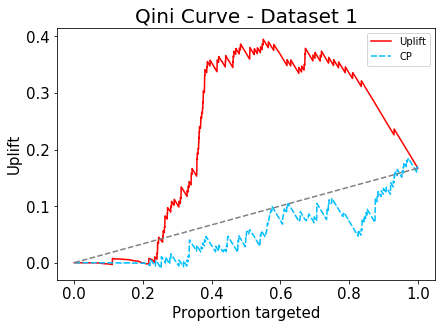

In [29]:
ax = plot_QINI(df_1)
plt.title('Qini Curve - Dataset 1',fontsize=20)

Text(0.5, 1.0, 'Qini Curve - Dataset 2')

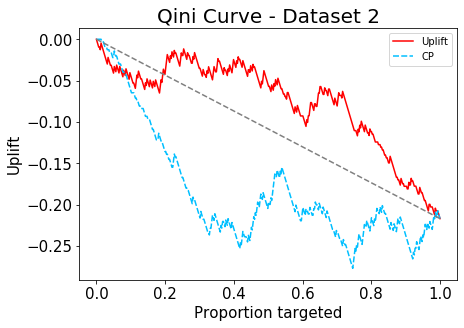

In [30]:
ax = plot_QINI(df_2)
plt.title('Qini Curve - Dataset 2',fontsize=20)

Text(0.5, 1.0, 'Qini Curve - Dataset 3')

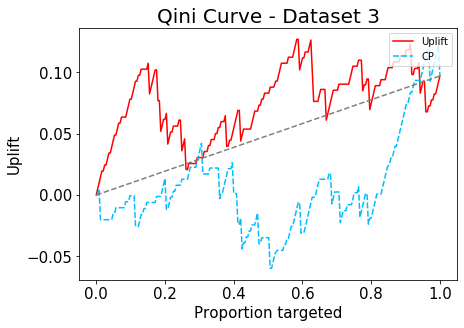

In [31]:
ax = plot_QINI(df_3)
plt.title('Qini Curve - Dataset 3',fontsize=20)

In [ ]:
df_1

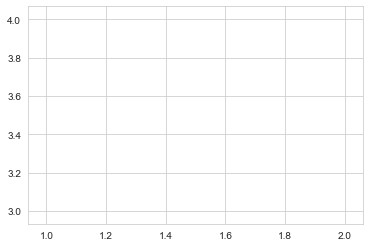

In [51]:
fig, ax = plt.subplots(1,1)
# dummy plots, just to get the Path objects
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')
square_mk, = a.get_paths()
triangle_up_mk, = b.get_paths()
a.remove()
b.remove()
def distribusi_target_class(df_1:pd.DataFrame, df_2:pd.DataFrame, df_3:pd.DataFrame, target_class:str):
    df_1['dataset'] = 'Dataset 1'
    df_2['dataset'] = 'Dataset 2'
    df_3['dataset'] = 'Dataset 3'
    df = pd.concat([df_1, df_2, df_3])
    ax = sns.swarmplot(data=df[df.target_class==target_class], x='dataset', y='n', 
                  hue='model', palette=['deepskyblue','red'], 
                       order=['Dataset 1', 'Dataset 2', 'Dataset 3'], size=5)
    collections = ax.collections
    unique_colors = np.unique(collections[0].get_facecolors(), axis=0)
    markers = [square_mk, triangle_up_mk]  # this array must be at least as large as the number of unique colors
    for collection in collections:
        paths = []
        for current_color in collection.get_facecolors():
            for possible_marker,possible_color in zip(markers, unique_colors):
                if np.array_equal(current_color,possible_color):
                    paths.append(possible_marker)
                    break
        collection.set_paths(paths)
        
        
    ax.tick_params(labelsize=15)   
    ax.legend(collections[-2:],pd.unique(df.model))  
    plt.title('CN Distributions - Test Result',fontsize=25, y=1.05)
    plt.ylabel('Employee rank',fontsize=20)
    plt.xlabel('')
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=1)
    plt.legend(fontsize='large')
#     plt.savefig('CN.pdf', bbox_inches='tight')
    return ax

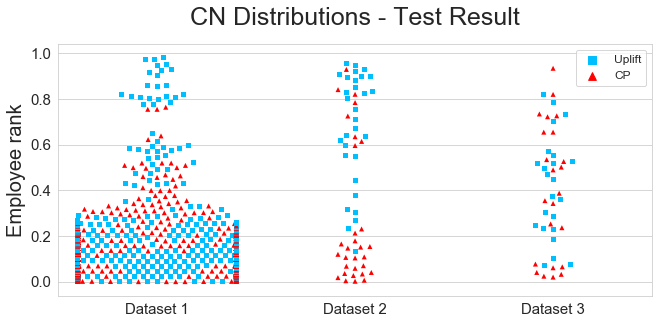

In [52]:
distribusi_target_class(df_1, df_2, df_3, 0)

In [ ]:
# distribusi_target_class(df_1, df_2, df_3, 1)

In [ ]:
# distribusi_target_class(df_1, df_2, df_3, 2)

In [ ]:
# distribusi_target_class(df_1, df_2, df_3, 3)